In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skies

%config InlineBackend.figure_format = "retina"

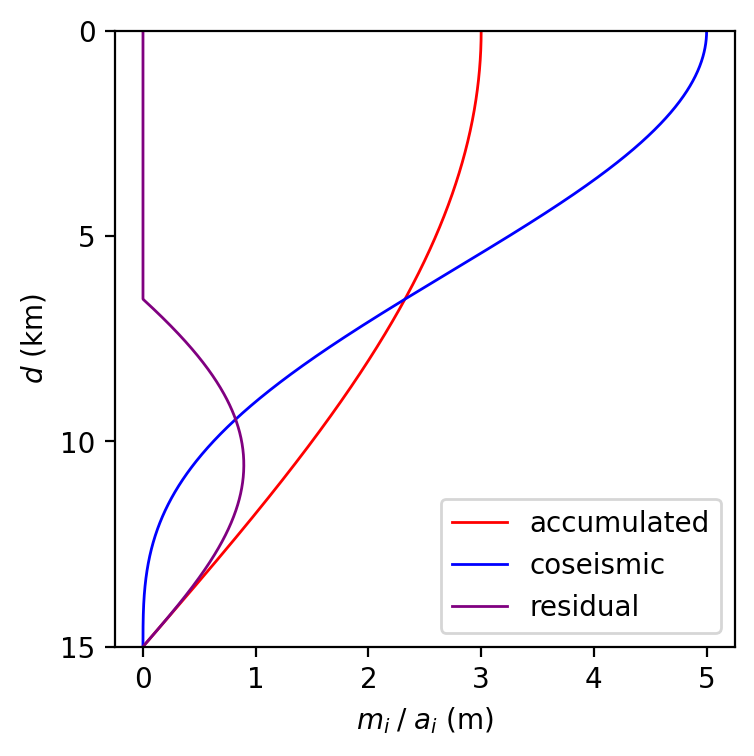

In [8]:
MM2M = 1e-3
KM2M = 1e3
Y2S = 365.25 * 24 * 3600
depth = 15e3
years = 100
reference_slip_deficit_rate = 30 * MM2M / Y2S  # mm/yr
n_pts = 1000
x = np.linspace(0, depth, n_pts)
segment_area = x[1] - x[0]

coseismic_slip_magnitude = 5.0
coseismic_slip = coseismic_slip_magnitude * np.cos(x / depth * np.pi / 2.0) ** 3.0

slip_deficit_rate = reference_slip_deficit_rate * np.cos(x / depth * np.pi / 2.0)
accumulated_geometric_moment = slip_deficit_rate * years * Y2S * segment_area
coseismic_geometric_moment = coseismic_slip * segment_area
residual_geometric_moment_all = accumulated_geometric_moment - coseismic_geometric_moment
residual_geometric_moment = residual_geometric_moment_all.copy()
residual_geometric_moment[residual_geometric_moment < 0] = 0

plt.figure(figsize=(4, 4))
plt.plot(accumulated_geometric_moment / segment_area, x / KM2M, "-r", label="accumulated", linewidth=1)
plt.plot(coseismic_geometric_moment / segment_area, x / KM2M, "-b", label="coseismic", linewidth=1)
plt.plot(residual_geometric_moment / segment_area, x / KM2M, "-", label="residual", linewidth=1, color="purple")
plt.ylim([0, 15])
plt.yticks([0, 5, 10, 15])
plt.gca().invert_yaxis()
plt.xlabel("$m_i \; / \; a_i$ (m)")
plt.ylabel("$d$ (km)")
plt.legend()
plt.show()


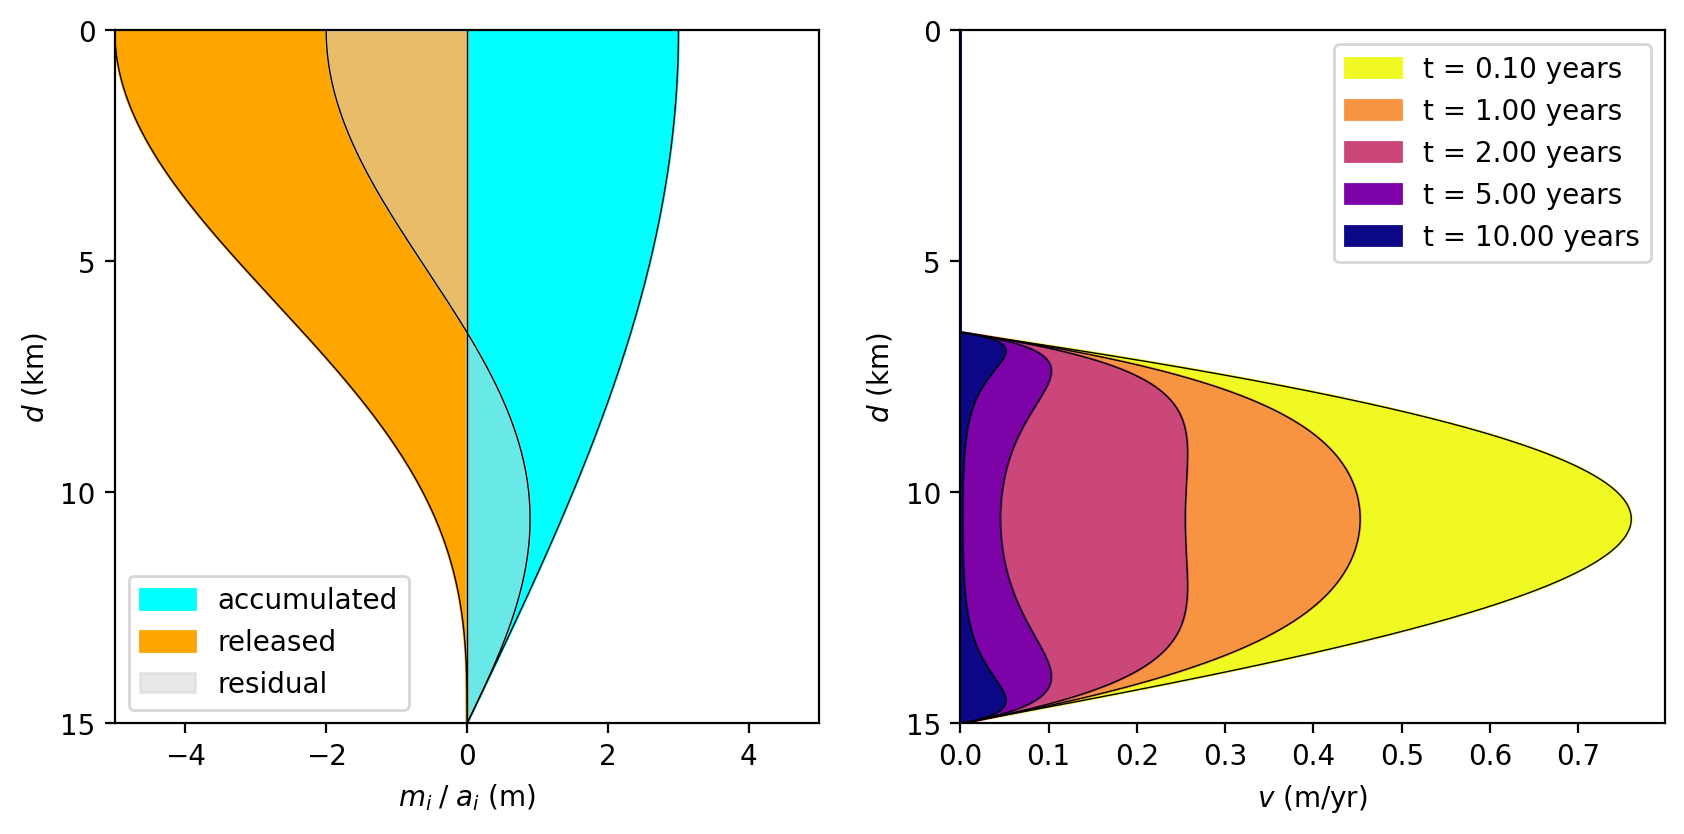

In [31]:
gamma = 0.1
n = n_pts
a = segment_area
c = 300
const = (c**2.0) * gamma / n
t = np.linspace(0, 10 / Y2S, 5)
t = np.array([0.1, 1.0, 2.0, 5.0, 10.0]) / Y2S
# t = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]) / Y2S

v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = (
        0.1
        * const
        * residual_geometric_moment
        / segment_area
        * np.exp(-(c**2.0) * residual_geometric_moment * a * t[i])
    )

# Geometric moments
plt.figure(figsize=(10, 4.5))
plt.subplot(1, 2, 1)

fill_y = np.array([x, np.flip(x)]).flatten()
fill_x = np.array([accumulated_geometric_moment / segment_area, np.zeros(n_pts)]).flatten()
plt.fill(
        fill_x,
        fill_y / 1e3,
        color="cyan",
        label="accumulated",
    )

fill_y = np.array([x, np.flip(x)]).flatten()
fill_x = np.array([-coseismic_geometric_moment / segment_area, np.zeros(n_pts)]).flatten()
plt.fill(
        fill_x,
        fill_y / 1e3,
        color="orange",
        label="released",
    )

fill_y = np.array([x, np.flip(x)]).flatten()
fill_x = np.array([residual_geometric_moment_all / segment_area, np.zeros(n_pts)]).flatten()
plt.fill(
        fill_x,
        fill_y / 1e3,
        color="lightgrey",
        label="residual", alpha=0.5, 
    )

plt.plot(accumulated_geometric_moment / segment_area, x / KM2M, "-k", linewidth=0.5)
plt.plot(-coseismic_geometric_moment / segment_area, x / KM2M, "-k", linewidth=0.5)
plt.plot(residual_geometric_moment_all / segment_area, x / KM2M, "-k", linewidth=0.5)
plt.plot([0, 0], [0, 15], "-k", linewidth=0.5)

plt.xlim(-5, 5)
plt.ylim([0, 15])
plt.yticks([0, 5, 10, 15])
plt.gca().invert_yaxis()
plt.xlabel("$m_i \; / \; a_i$ (m)")
plt.ylabel("$d$ (km)")
plt.legend(loc="lower left")

# After-slip velocities
plt.subplot(1, 2, 2)
colors = plt.get_cmap("plasma_r")(np.linspace(0.0, 1.0, len(t)))
for i in range(len(t)):
    plt.plot(v[:, i], x / 1e3, "-k", linewidth=0.5)
    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([v[:, i], np.zeros(n_pts)]).flatten()
    plt.fill(
        fill_x,
        fill_y / 1e3,
        color=colors[i, 0:3],
        label="t = {:.2f} years".format(t[i] * Y2S),
    )
plt.xlabel("$v$ (m/yr)")
plt.ylabel("$d$ (km)")
# plt.xlim([, ])
plt.yticks([0, 5, 10, 15])
plt.ylim([0, 15])
plt.gca().set_xlim(left=0.0)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


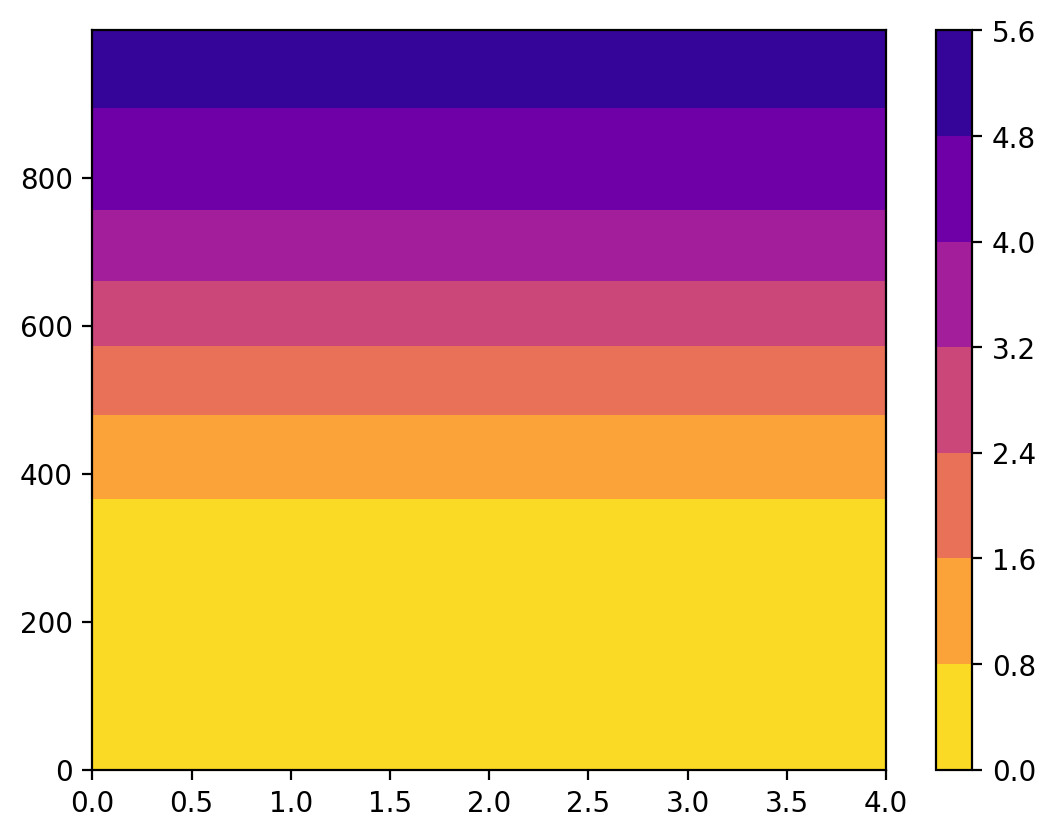

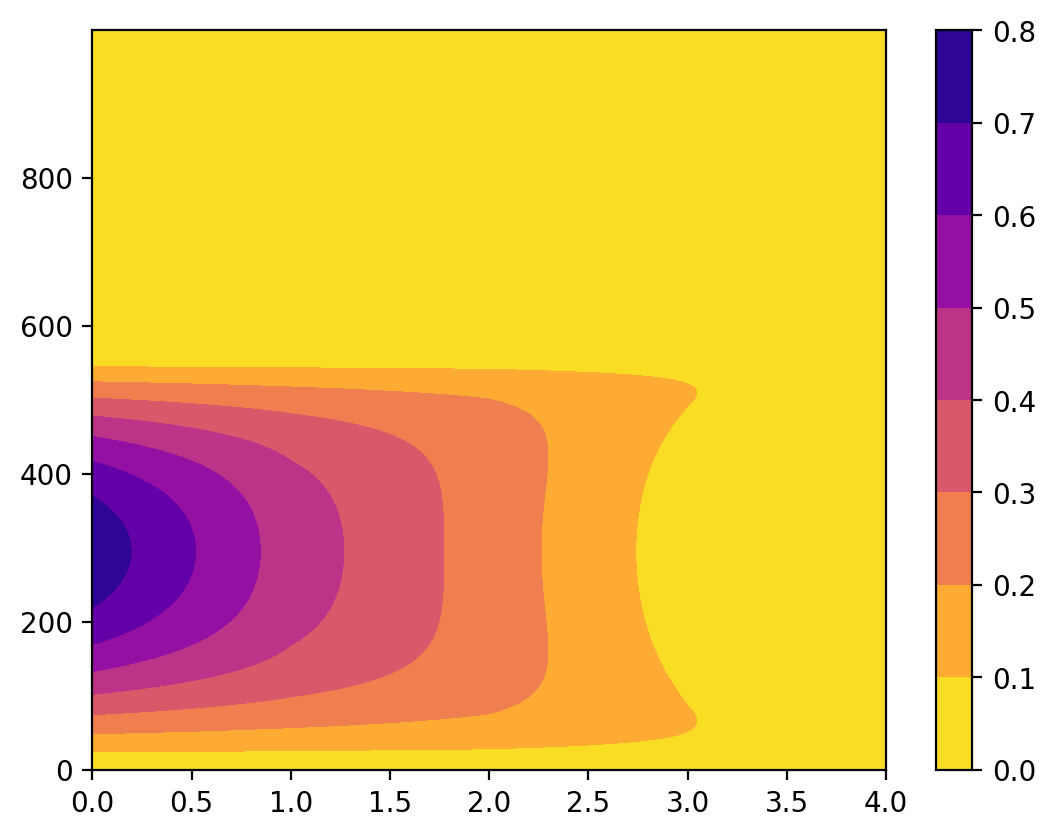

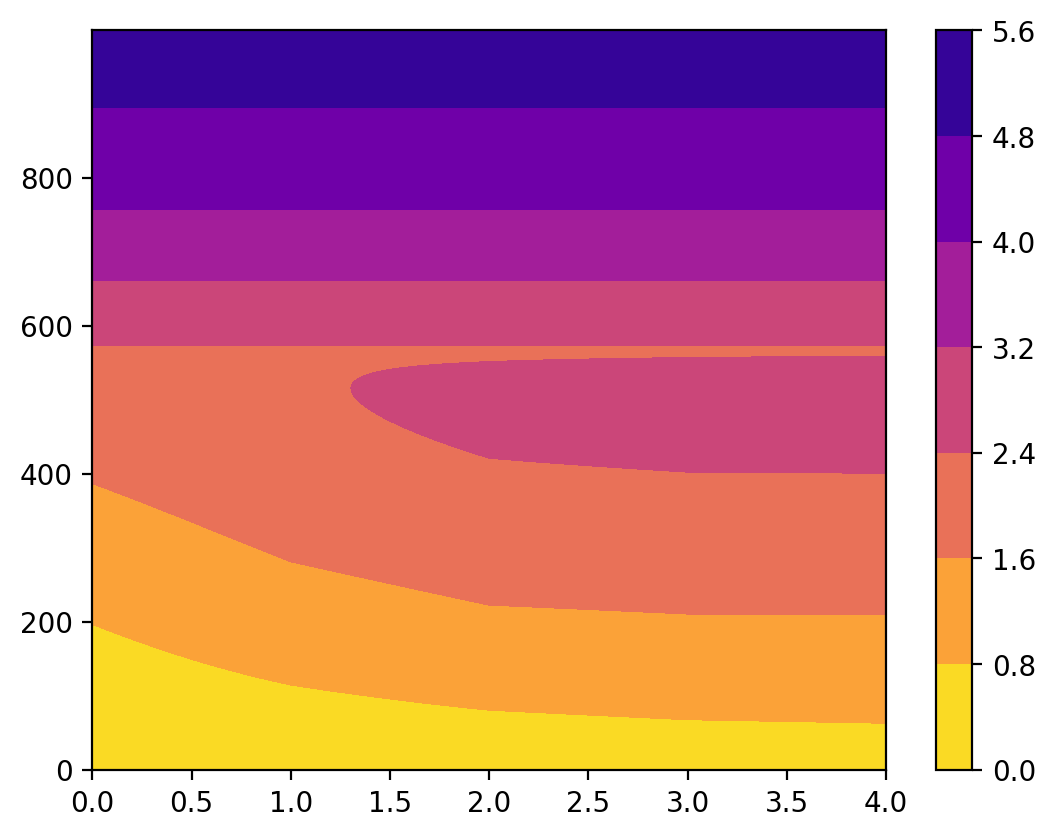

In [138]:
# Cumulative slip?
# Velocity plot?
# Add interseismic
plt.figure()
# plt.contourf(np.flipud(v), cmap="plasma_r")
plt.contourf(np.flipud(np.tile(coseismic_slip, (5, 1)).T), cmap="plasma_r")
plt.colorbar()
plt.show()

plt.figure()
plt.contourf(np.flipud(v), cmap="plasma_r")
# plt.contourf(np.flipud(np.cumsum(v + np.tile(coseismic_slip, (5, 1)).T, axis=1)), cmap="plasma_r")
plt.colorbar()
plt.show()

plt.figure()
plt.contourf(np.flipud(np.cumsum(v, axis=1)) + np.flipud(np.tile(coseismic_slip, (5, 1)).T), cmap="plasma_r")
# plt.contourf(np.flipud(np.cumsum(v + np.tile(coseismic_slip, (5, 1)).T, axis=1)), cmap="plasma_r")
plt.colorbar()
plt.show()


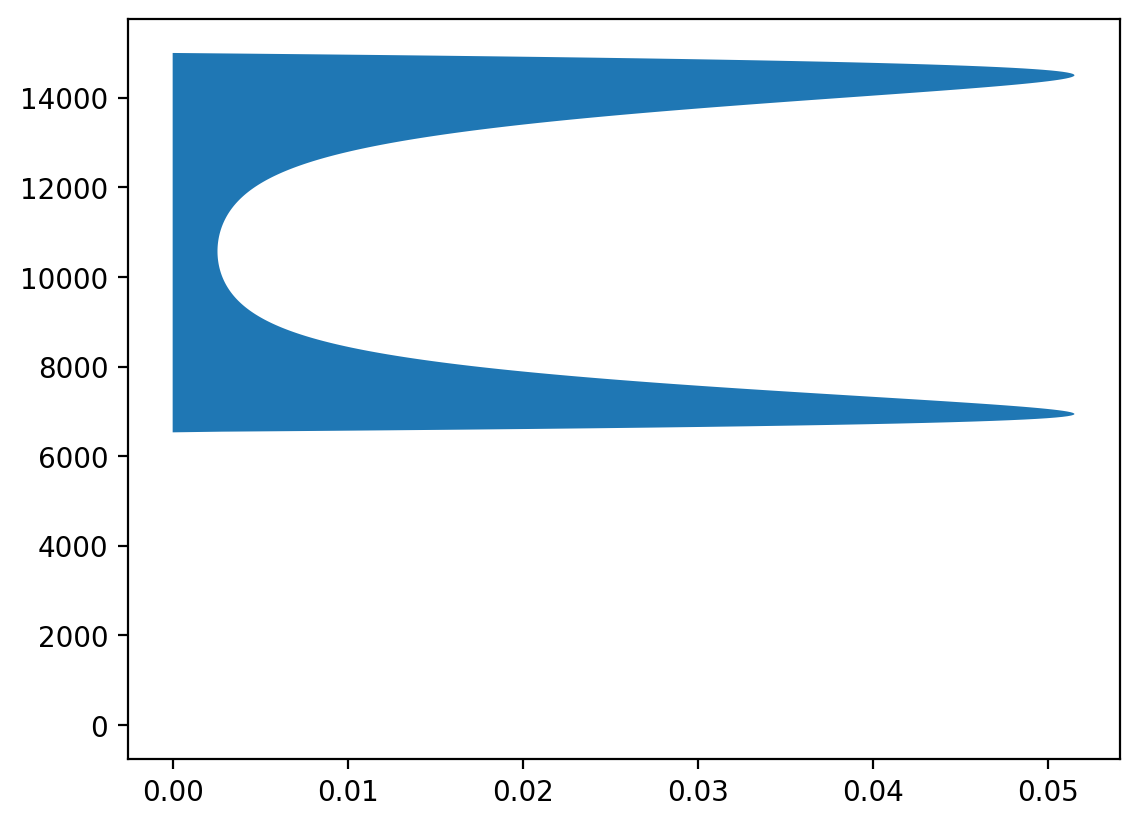

In [152]:
plt.fill(fill_x, fill_y)

In [143]:
fill_x.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

In [167]:
cmap = plt.cm.viridis(N=6)

TypeError: Colormap.__call__() got an unexpected keyword argument 'N'

In [161]:
cmap

(0.274952, 0.037752, 0.364543, 1.0)

In [165]:
import matplotlib as mpl

cmap = plt.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

In [170]:
a = mpl.colors.Colormap("plasma", N=256)

In [172]:
a.

In [180]:
a = plt.cm.viridis(range(6))
a[i, 0:3]

array([0.272594, 0.025563, 0.353093])

In [196]:
colors = plt.cm.plasma(range(0, 10))
c = plt.cm.plasma
print(colors)
print(c)

[[0.050383 0.029803 0.527975 1.      ]
 [0.063536 0.028426 0.533124 1.      ]
 [0.075353 0.027206 0.538007 1.      ]
 [0.086222 0.026125 0.542658 1.      ]
 [0.096379 0.025165 0.547103 1.      ]
 [0.10598  0.024309 0.551368 1.      ]
 [0.115124 0.023556 0.555468 1.      ]
 [0.123903 0.022878 0.559423 1.      ]
 [0.132381 0.022258 0.56325  1.      ]
 [0.140603 0.021687 0.566959 1.      ]]


In [198]:
c.colors

[[0.050383, 0.029803, 0.527975],
 [0.063536, 0.028426, 0.533124],
 [0.075353, 0.027206, 0.538007],
 [0.086222, 0.026125, 0.542658],
 [0.096379, 0.025165, 0.547103],
 [0.10598, 0.024309, 0.551368],
 [0.115124, 0.023556, 0.555468],
 [0.123903, 0.022878, 0.559423],
 [0.132381, 0.022258, 0.56325],
 [0.140603, 0.021687, 0.566959],
 [0.148607, 0.021154, 0.570562],
 [0.156421, 0.020651, 0.574065],
 [0.16407, 0.020171, 0.577478],
 [0.171574, 0.019706, 0.580806],
 [0.17895, 0.019252, 0.584054],
 [0.186213, 0.018803, 0.587228],
 [0.193374, 0.018354, 0.59033],
 [0.200445, 0.017902, 0.593364],
 [0.207435, 0.017442, 0.596333],
 [0.21435, 0.016973, 0.599239],
 [0.221197, 0.016497, 0.602083],
 [0.227983, 0.016007, 0.604867],
 [0.234715, 0.015502, 0.607592],
 [0.241396, 0.014979, 0.610259],
 [0.248032, 0.014439, 0.612868],
 [0.254627, 0.013882, 0.615419],
 [0.261183, 0.013308, 0.617911],
 [0.267703, 0.012716, 0.620346],
 [0.274191, 0.012109, 0.622722],
 [0.280648, 0.011488, 0.625038],
 [0.287076, 0.01

In [210]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
colors = plt.get_cmap('Blues')(np.linspace(0.0, 1.0, 3))
print(colors)

[[0.96862745 0.98431373 1.         1.        ]
 [0.41708574 0.68063053 0.83823145 1.        ]
 [0.03137255 0.18823529 0.41960784 1.        ]]


In [202]:
colors()

TypeError: Colormap.__call__() missing 1 required positional argument: 'X'